In [1]:
import pandas as pd
import json
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

# All timing are in micro seconds (us) 

In [39]:
df = pd.read_csv("./results/mm_oob_avg.csv")
pd.options.display.max_rows = 999
confs = list(df['conf'].values)
unq_m = df['m'].unique()
n_confs = int(df.shape[0] / len(unq_m))
df

,conf,m,grid_size,in0_storage_type,in1_storage_type,out_storage_type,dtype,math_fidelity,conversion_in0,conversion_in1,transfer_in0,transfer_in1,tilization_in0,tilization_in1,inference_avg,iters
0,f16_m2,256,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,255.281120,221.675821,331.222368,356.100131,415.013526,287.795546,328.677476,100.0
1,f16_m2,512,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,434.234238,246.689403,714.687341,484.143101,327.426638,325.498517,343.824680,100.0
2,f16_m2,1024,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,516.316762,240.494166,1018.278918,967.627593,402.899294,352.229950,498.797122,100.0
3,f16_m2,2048,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,406.473084,220.759249,3576.624308,3475.651982,715.504918,698.075665,1176.135352,100.0
4,f16_m2,3072,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,572.661895,415.502944,7966.997297,7708.303608,1662.727074,1511.263648,2542.322417,100.0
5,f16_m2,4096,0.0,DRAM,DRAM,DRAM,DataType.BFLOAT16,MathFidelity.HiFi2,615.406220,410.598127,13903.590998,13678.708079,2306.892868,2205.898490,4783.753749,100.0


In [40]:
conf_infos = dict()
infs = ['in0_storage_type',
       'in1_storage_type', 'out_storage_type', 'dtype', 'math_fidelity',]
for conf in confs:
    conf_infos[conf] = dict()
    val0 = df.loc[df['conf'] == conf]
    for inf in infs:
        conf_infos[conf][inf] = val0[inf].values[0]
conf_infos

{'f16_m2': {'in0_storage_type': 'DRAM',
  'in1_storage_type': 'DRAM',
  'out_storage_type': 'DRAM',
  'dtype': 'DataType.BFLOAT16',
  'math_fidelity': 'MathFidelity.HiFi2'}}

In [41]:
def get_column_df_info(df_inf, d_name, c_name = 'conf', mean=False):
    data = dict()
    c_list = df_inf[c_name].unique()

    for c in c_list:
        data[c] = list()

        for m in unq_m:
            val0 = df_inf.loc[(df_inf['m'] == m) & (df_inf[c_name] == c)][d_name].values
            if mean:
                val0 = val0.mean()
            else:
                val0 = val0[0]
            data[c].append(val0)

    df_c = pd.DataFrame.from_dict(data)
    df_c.set_index(unq_m, inplace=True)
    return df_c

## Data movement 

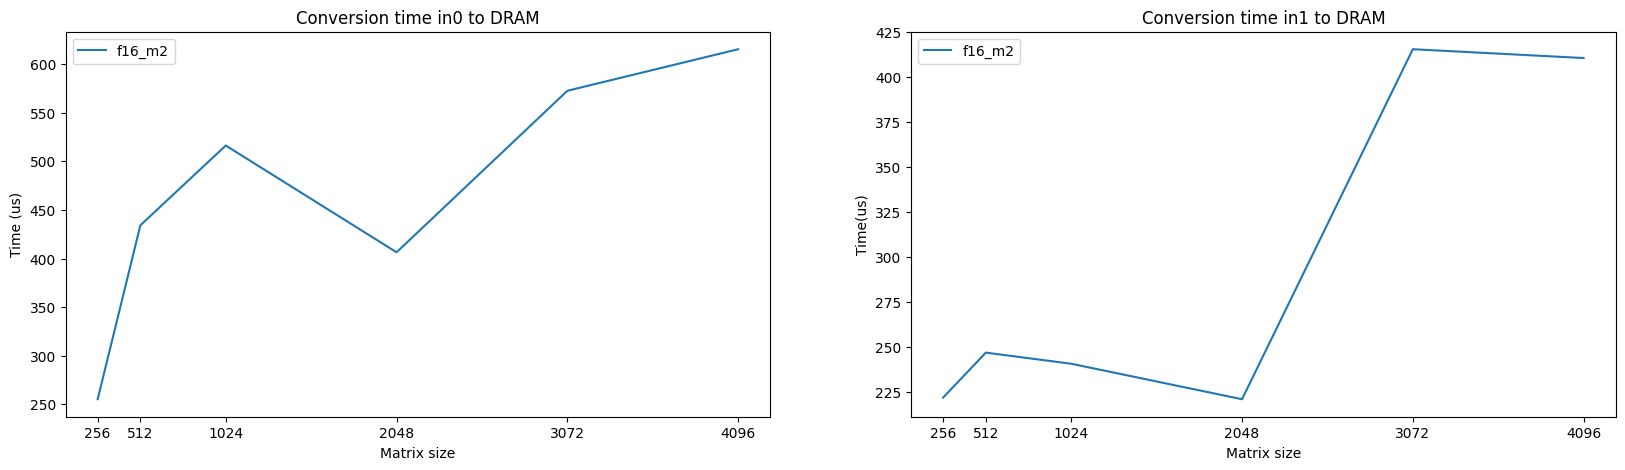

In [42]:
df_conversion0 = get_column_df_info(df, 'conversion_in0', mean=True) 
df_conversion1 = get_column_df_info(df, 'conversion_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_conversion0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Conversion time in0 to DRAM")

plot = sns.lineplot(df_conversion1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Conversion time in1 to DRAM")

plt.show()

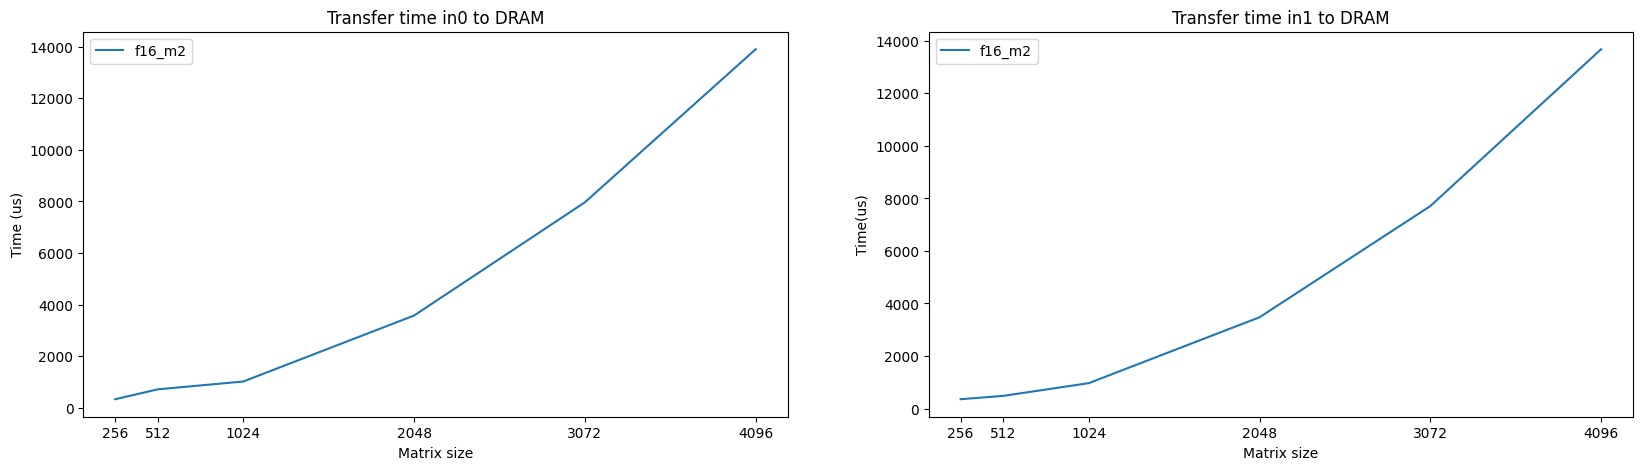

In [43]:
df_transf0 = get_column_df_info(df, 'transfer_in0', mean=True) 
df_transf1 = get_column_df_info(df, 'transfer_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_transf0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Transfer time in0 to DRAM")

plot = sns.lineplot(df_transf1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Transfer time in1 to DRAM")

plt.show()


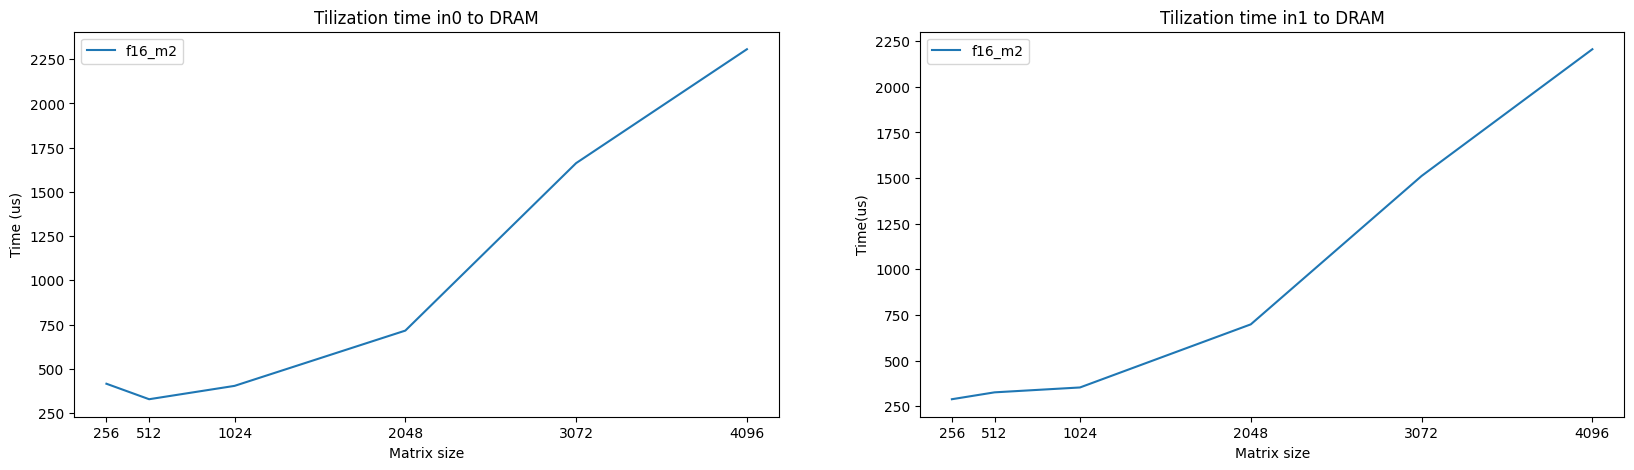

In [44]:
df_tilization0 = get_column_df_info(df, 'tilization_in0', mean=True) 
df_tilization1 = get_column_df_info(df, 'tilization_in1', mean=True)

fig, ax = plt.subplots(1,2, figsize=(20,5))
plot = sns.lineplot(df_tilization0, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time (us)")
plot.set_title("Tilization time in0 to DRAM")

plot = sns.lineplot(df_tilization1, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Time(us)")
plot.set_title("Tilization time in1 to DRAM")

plt.show()


### Calculate Mb/s transfer

In [45]:
df_transf_norm_b = pd.DataFrame()
elements = df_transf0.index * df_transf0.index
for conf in df_transf0.columns:
    df_transf_norm_b[conf] = (16 * elements) / df_transf0[conf]

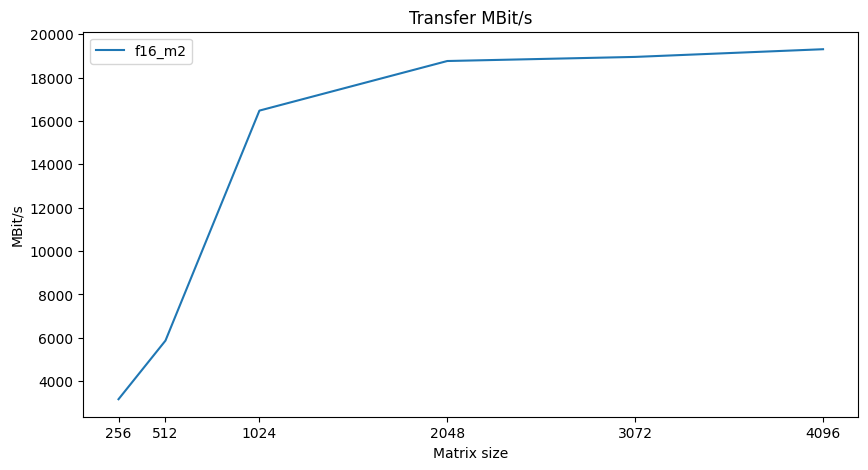

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
plot = sns.lineplot(df_transf_norm_b, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("MBit/s")
plot.set_title("Transfer MBit/s")

plt.show()

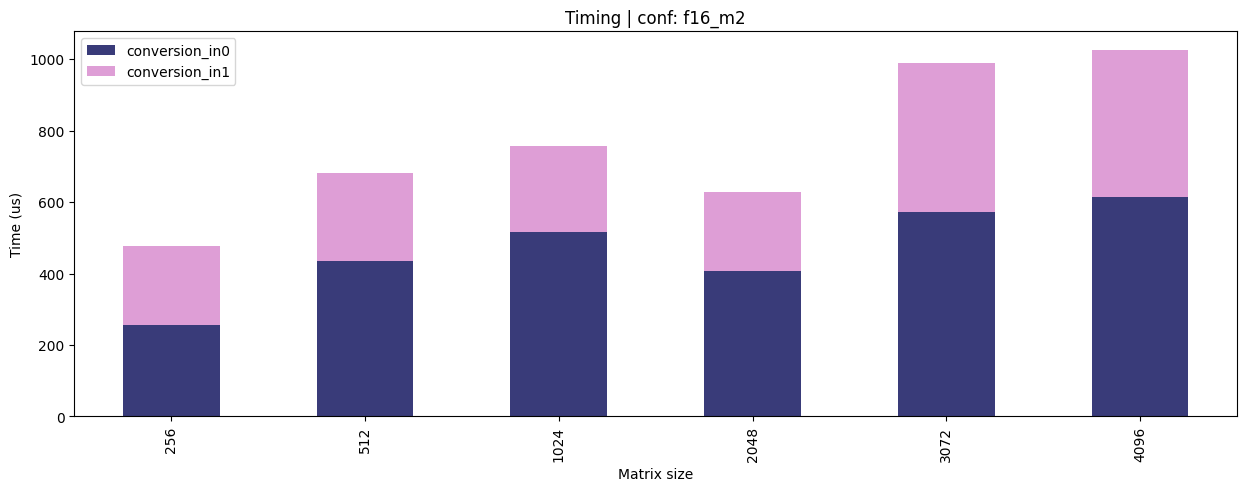

In [59]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in1"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=axs, colormap="tab20b")

plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

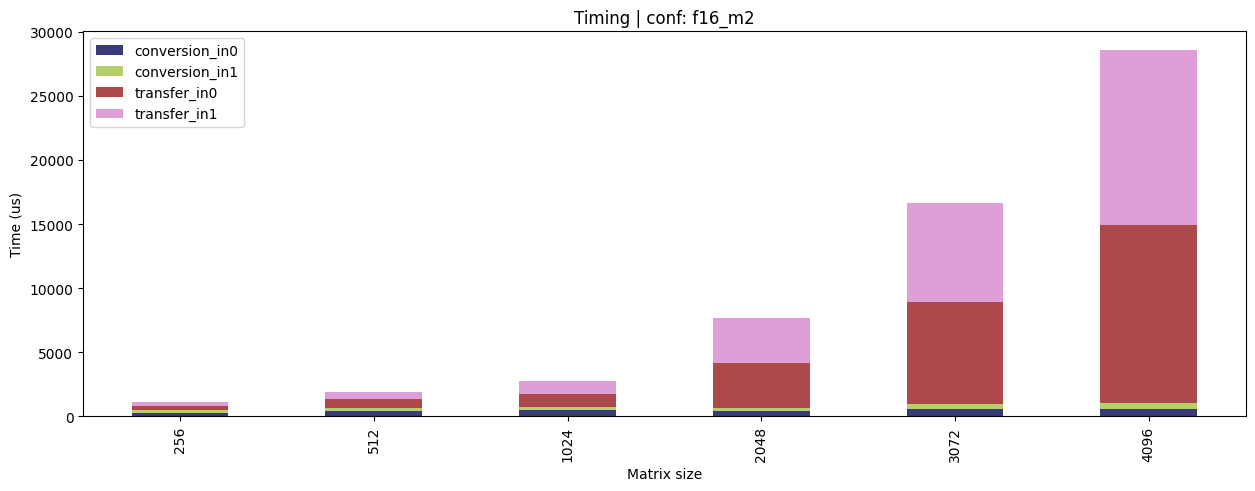

In [60]:
fig, axs = plt.subplots( figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1, df_transf0, df_transf1], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in1", "transfer_in0", "transfer_in1"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=axs, colormap="tab20b")

plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

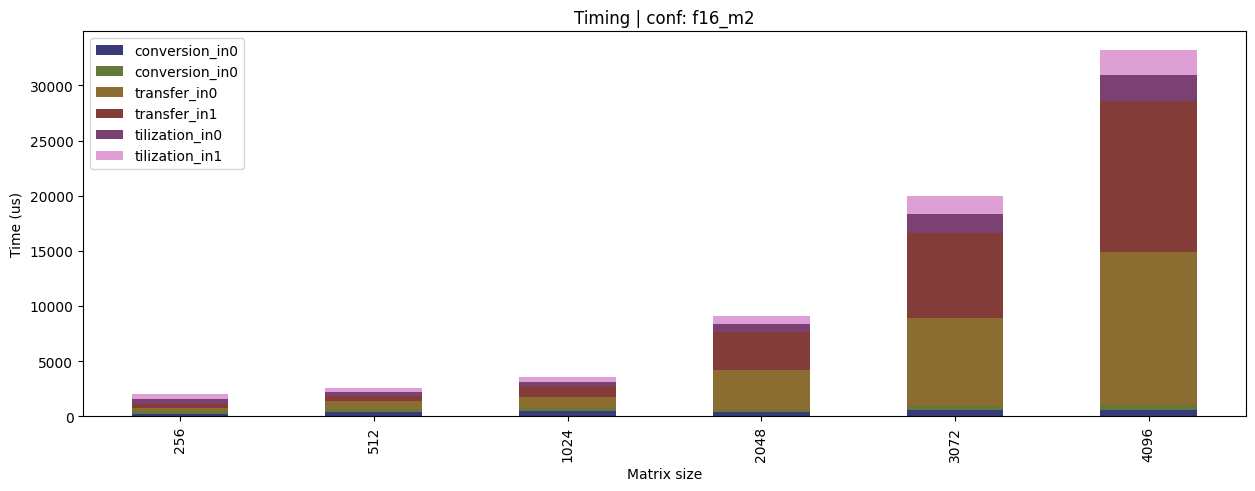

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
df_combined = pd.concat([df_conversion0, df_conversion1, df_transf0, df_transf1, df_tilization0, df_tilization0], axis=1)
df_combined.columns = ["conversion_in0", "conversion_in0", "transfer_in0", "transfer_in1", "tilization_in0", "tilization_in1"]
df_combined

# Create a stacked bar plot
plot = df_combined.plot(kind='bar', stacked=True, ax=ax, colormap="tab20b")

plot.set_title(f'Timing | conf: {conf}')
plot.set_xlabel('Matrix size')
plot.set_ylabel('Time (us)')
plt.show()

In [63]:
df_data_mv = df_conversion0 + df_conversion1 + df_transf0 + df_transf1 + df_tilization0 + df_tilization0
df_data_mv

,f16_m2
256,1994.306493
512,2534.607361
1024,3548.516026
2048,9110.518459
3072,19988.919891
4096,33222.089160


## Inference

In [52]:
df_avg = get_column_df_info(df, 'inference_avg')
df_avg

,f16_m2
256,328.677476
512,343.824680
1024,498.797122
2048,1176.135352
3072,2542.322417
4096,4783.753749


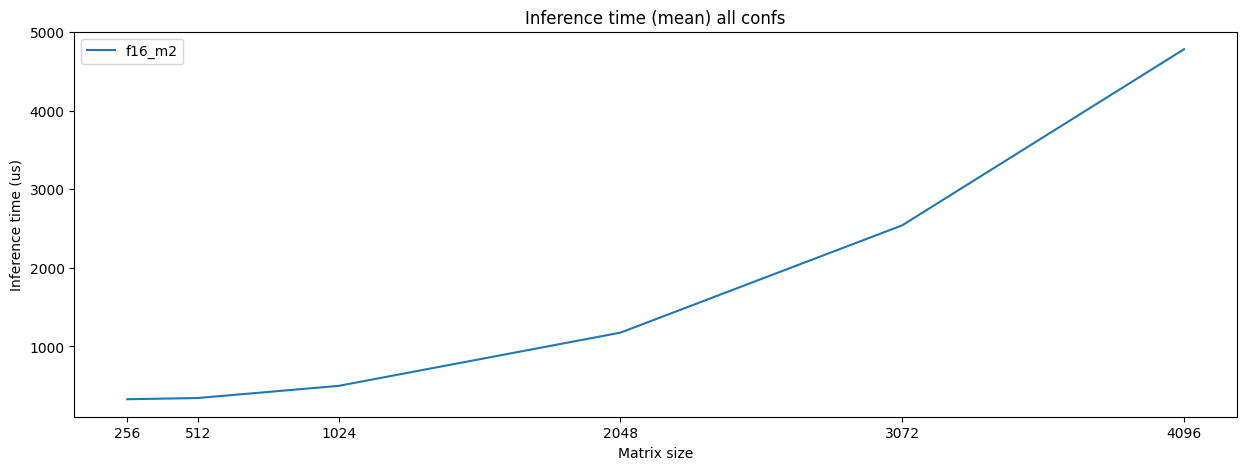

In [53]:
fig, ax = plt.subplots(figsize=(15,5))

plot = sns.lineplot(df_avg, ax=ax)
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) all confs")

plt.show()

In [54]:
df_avg_dtype = get_column_df_info(df, 'inference_avg', c_name='dtype', mean=True)
df_avg_dtype

,DataType.BFLOAT16
256,328.677476
512,343.824680
1024,498.797122
2048,1176.135352
3072,2542.322417
4096,4783.753749


In [55]:
df_avg_math_fidelity = get_column_df_info(df, 'inference_avg', c_name='math_fidelity', mean=True)
df_avg_math_fidelity

,MathFidelity.HiFi2
256,328.677476
512,343.824680
1024,498.797122
2048,1176.135352
3072,2542.322417
4096,4783.753749


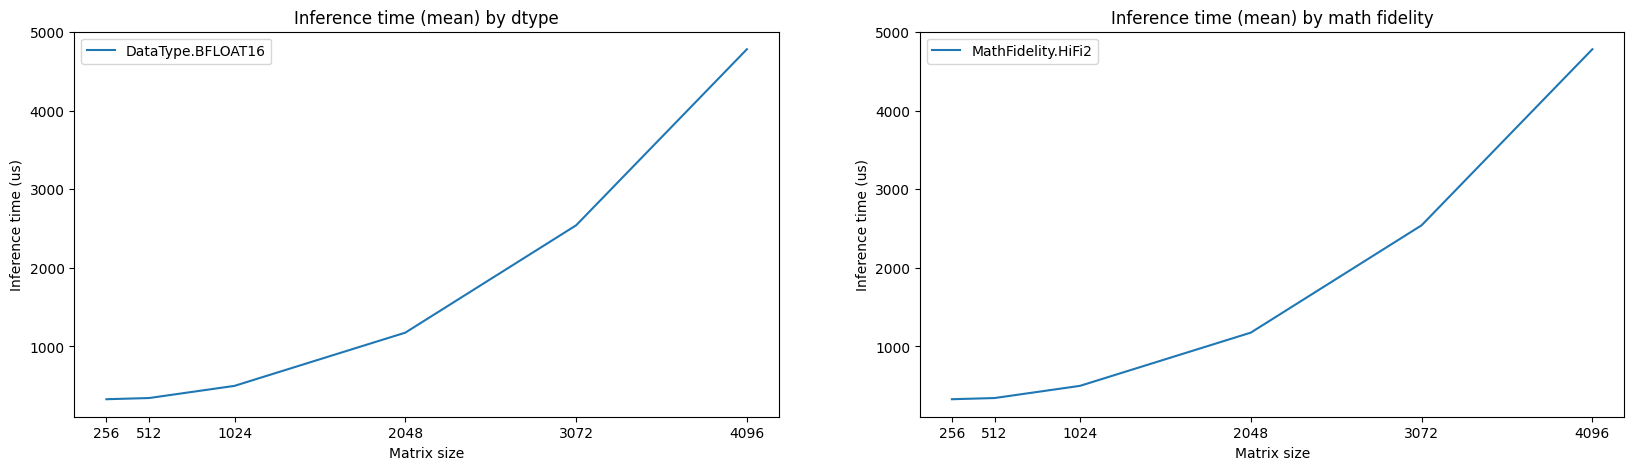

In [56]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

plot = sns.lineplot(df_avg_dtype, ax=ax[0])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by dtype")

plot = sns.lineplot(df_avg_math_fidelity, ax=ax[1])
plot.set_xticks(unq_m)
plot.set_xlabel("Matrix size")
plot.set_ylabel("Inference time (us)")
plot.set_title("Inference time (mean) by math fidelity")

plt.show()
